In [10]:
import pandas as pd
df = pd.read_csv('CLEAN.csv')


In [11]:
#stanford dataset
accepted = df[df['Acceptances'].str.contains('STANFORD')]
accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
accepted['Decision'] = 'Accepted'

waitlisted = df[df['Waitlists'].str.contains('STANFORD')]
waitlisted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
waitlisted['Decision'] = 'Waitlisted'

rejected = df[df['Rejections'].str.contains('STANFORD')]
rejected.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
rejected['Decision'] = 'Rejected'

dataset = pd.concat([accepted, rejected])
dataset.drop(columns=['Note'], inplace=True)
dataset

C:\Users\shrey\AppData\Local\Temp\ipykernel_65468\1670667171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_65468\1670667171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted['Decision'] = 'Accepted'
C:\Users\shrey\AppData\Local\Temp\ipykernel_65468\1670667171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
1,OTHER,ASIAN,IN,High,-1,NONE,CS,1390,5.5,4.5,Accepted
16,M,WHITE,CA,Low,PUBLIC,NONE,BIO,1540,7.5,7.3,Accepted
41,M,ASIAN,OR,Low,PUBLIC,FIRST-GEN,CS,1530,3.5,3.7,Accepted
55,M,HISPANIC,CA,Low,PUBLIC,URM,-1,1330,5.5,6.8,Accepted
121,M,ASIAN,CO,High,PUBLIC,FIRST-GEN,-1,1430,5.5,2.5,Accepted
...,...,...,...,...,...,...,...,...,...,...,...
1475,M,ASIAN,GA,-1,PUBLIC,NONE,CS,1550,8.5,6.5,Rejected
1477,F,ASIAN,TX,Low,PUBLIC,NONE,ENG,1480,6.5,4.5,Rejected
1479,M,ASIAN,GA,Middle,PUBLIC,LGBT,BIO,1580,5.0,3.5,Rejected
1480,F,ASIAN,CA,High,PUBLIC,NONE,CS,1590,7.5,3.5,Rejected


In [24]:
#tokensize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Race'] = le.fit_transform(dataset['Race'])
dataset['Residence'] = le.fit_transform(dataset['Residence'])
dataset['Income'] = le.fit_transform(dataset['Income'])
dataset['School Type'] = le.fit_transform(dataset['School Type'])
dataset['Hooks'] = le.fit_transform(dataset['Hooks'])
dataset['Major'] = le.fit_transform(dataset['Major'])
dataset['Decision'] = le.fit_transform(dataset['Decision'])


original_index = dataset.index
y = dataset['Decision']
X = dataset.drop('Decision', axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(data_scaled, columns=X.columns, index=original_index)
df_scaled['Decision'] = y

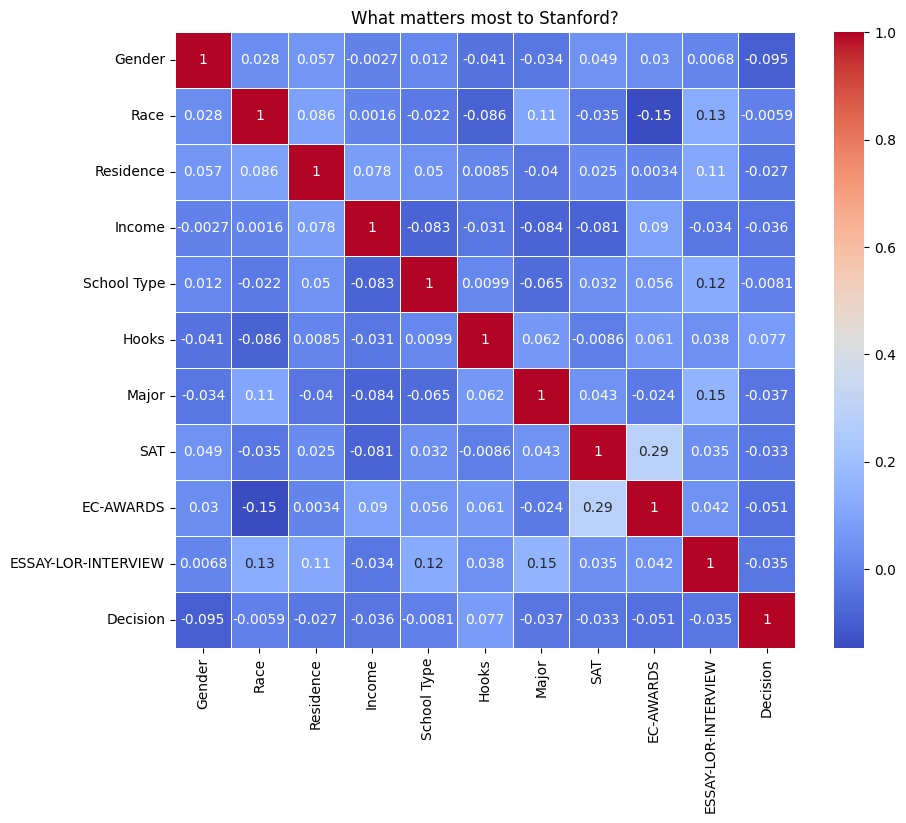

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_scaled.corr()


#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('What matters most to Stanford?')
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is called 'df'
# and the target column is 'final_label'

# Separate features (X) and target variable (y)
X = df_scaled.drop(columns=['Decision'], axis=1)
y = df_scaled['Decision']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)










from sklearn.ensemble import RandomForestClassifier
# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")











from sklearn.linear_model import LogisticRegression

# Create and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")



Random Forest Accuracy: 0.8543689320388349
Logistic Regression Accuracy: 0.8640776699029126


[0.13558576 0.13082217]


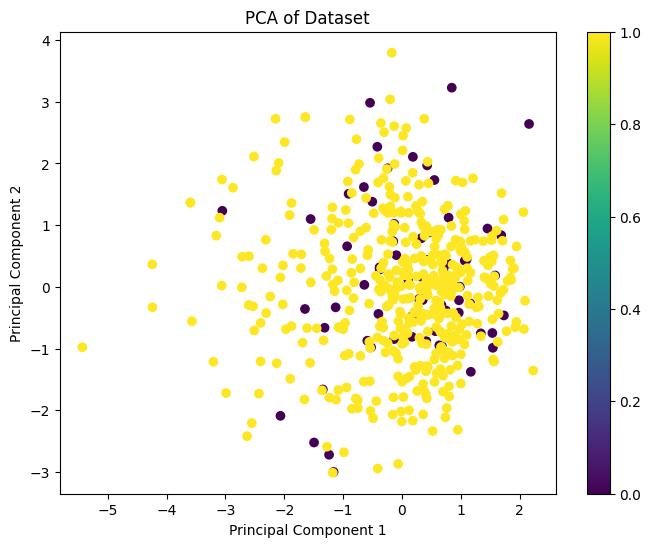

In [27]:
from sklearn.decomposition import PCA

# Initialize PCA, specifying the number of components
pca = PCA(n_components=2)  # You can start with 2 for visualization

# Fit and transform the data
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

target_variable = dataset['Decision']

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=target_variable, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

Accuracy: 0.8155

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.89      0.90      0.89        89

    accuracy                           0.82       103
   macro avg       0.60      0.59      0.60       103
weighted avg       0.81      0.82      0.81       103



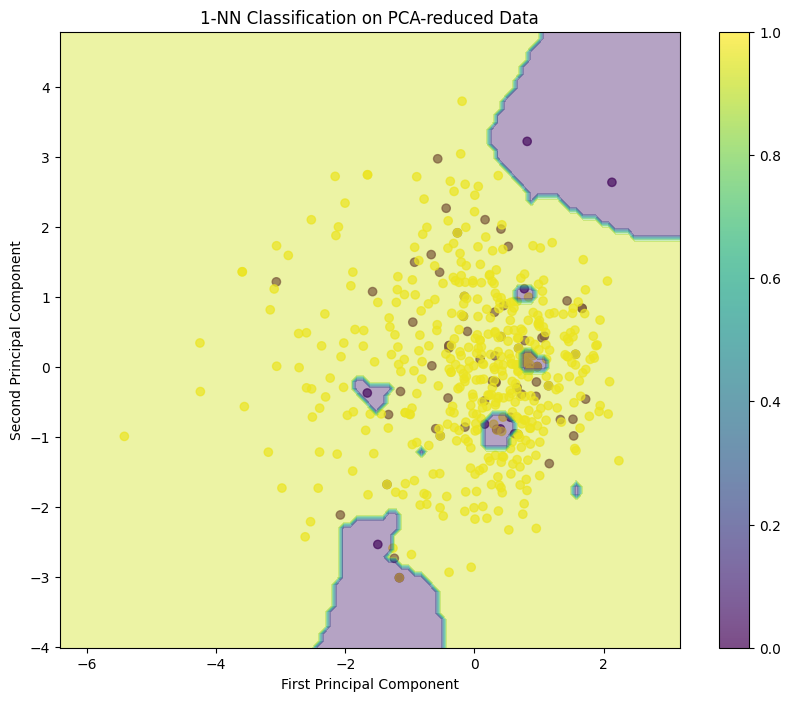

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have your original dataset in a variable called 'dataset'
# and your target variable is 'Decision'

# 1. Prepare the data
X = dataset.drop('Decision', axis=1)
y = dataset['Decision']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=3)  # You can adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Create and train the 1-NN model
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train, y_train)

# 6. Make predictions
y_pred = nn_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Visualize the results (for 2D PCA)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('1-NN Classification on PCA-reduced Data')
plt.colorbar(scatter)

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = nn_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.show()